In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
chartDC = pd.read_csv("datasets/DC_Properties.csv")

C:\Users\RqPy27-Odm351\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
chartDC.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
BATHRM,4,3,3,3,2
HF_BATHRM,0,1,1,1,1
HEAT,Warm Cool,Warm Cool,Hot Water Rad,Hot Water Rad,Warm Cool
AC,Y,Y,Y,Y,Y
NUM_UNITS,2,2,2,2,1
ROOMS,8,11,9,8,11
BEDRM,4,5,5,5,3
AYB,1910,1898,1910,1900,1913
YR_RMDL,1988,2007,2009,2003,2012


In [5]:
chartDC.columns

Index(['Unnamed: 0', 'BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS',
       'BEDRM', 'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'PRICE',
       'QUALIFIED', 'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE',
       'CNDTN', 'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES',
       'USECODE', 'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'CMPLX_NUM',
       'LIVING_GBA', 'FULLADDRESS', 'CITY', 'STATE', 'ZIPCODE', 'NATIONALGRID',
       'LATITUDE', 'LONGITUDE', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD',
       'CENSUS_TRACT', 'CENSUS_BLOCK', 'WARD', 'SQUARE', 'X', 'Y', 'QUADRANT'],
      dtype='object')

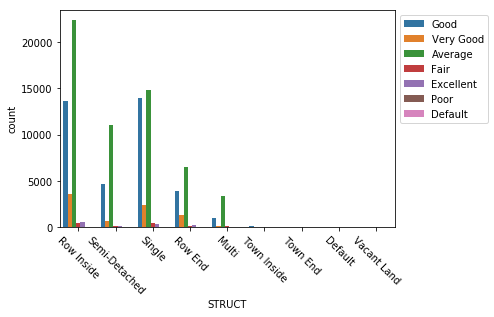

In [7]:
#create a barplot
sns.countplot(x='STRUCT', hue='CNDTN', data=chartDC)
plt.xticks(rotation=-45)
#put the legend on the right
plt.legend(bbox_to_anchor=(1,1), loc=2)

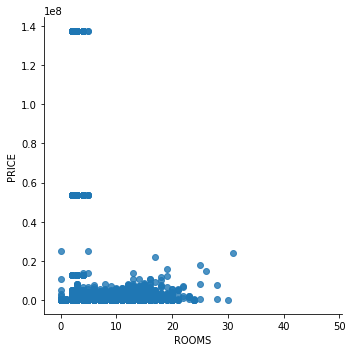

In [10]:
#make a scatterplot without regression line
sns.lmplot(y='PRICE', x='ROOMS', 
           fit_reg=False, 
           data=chartDC) 

In [11]:
#calculate and remove outliers
meangrade = chartDC['PRICE'].mean()
stdgrade = chartDC['PRICE'].std()
toprange = meangrade + stdgrade * 1.96
botrange = meangrade - stdgrade * 1.96

copychartDC = chartDC.copy() #to not mess up the original df
copychartDC = copychartDC.drop(copychartDC[copychartDC['PRICE'] > toprange].index)
copychartDC = copychartDC.drop(copychartDC[copychartDC['PRICE'] < botrange].index)

(0, 35)

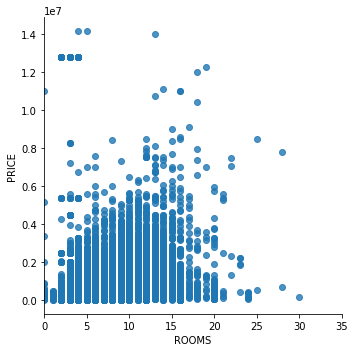

In [14]:
#make a scatterplot with the outliers
sns.lmplot(y='PRICE', x='ROOMS', 
           fit_reg=False, 
           data =copychartDC) 
plt.xlim(0,35)

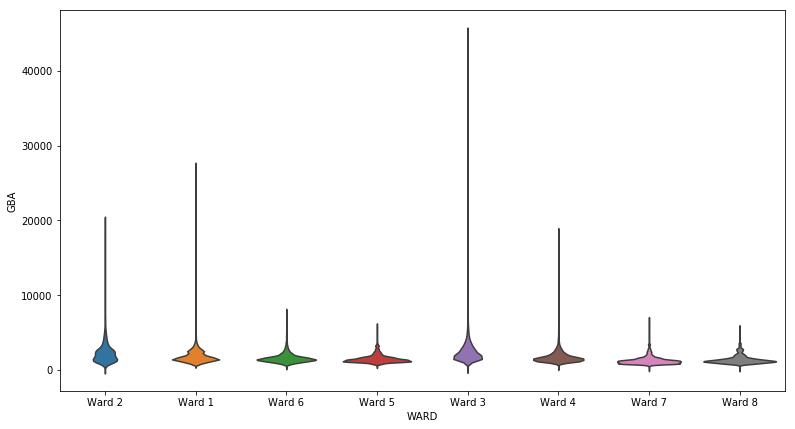

In [15]:
#make a violin plot
plt.subplots(figsize=(13,7))
sns.violinplot(x='WARD', y='GBA', inner=None, data=chartDC)

(0, 6000)

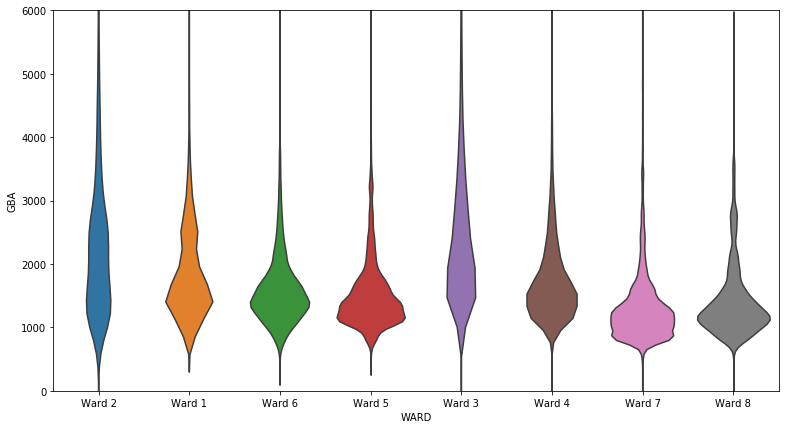

In [17]:
#make a violin plot with y-axiz adjusted
plt.subplots(figsize=(13,7))
sns.violinplot(x='WARD', y='GBA', inner=None, data=chartDC)
plt.ylim(0,6000)